In [36]:
import numpy as np
import imageio
import cv2 as cv2
import matplotlib.pyplot as plt
import glob

In [37]:
train_imgs = np.array([np.array(imageio.imread(filename)) for filename in glob.glob('../TRAIN/*.jpg')])

# Preprocessing

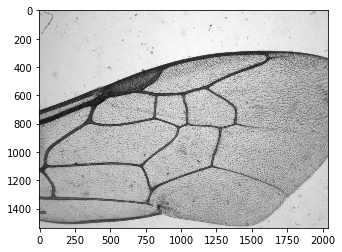

In [38]:
#im = cv2.imread('../TEST/0_inf.jpg')
im = train_imgs[0]
img = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
img.shape, img.dtype
plt.imshow(img, cmap='gray')

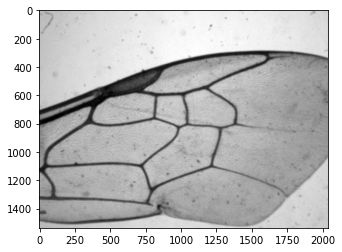

In [39]:
for i in range(20):
    blur = cv2.GaussianBlur(img,(5,5),0)
    img = blur
plt.imshow(blur, cmap='gray')

In [40]:
def otsu(arr):
    
    #Convert intensity values into int values
    arr = arr.astype(int)
    
    #List of intensity values
    vals = list(np.unique(arr))  
    vals_hist = list(np.copy(vals))   
    vals_hist.append(max(vals) + 1)

    #Compute the image histogram
    hist, bin_edges = np.histogram(arr, bins=vals_hist)

    #Normalize the histogram
    p_i = hist / hist.sum()

    #Test each threshold value partionning the histogram into 2 classes
    sigmas_b2 = []
    for cnt, threshold_val in enumerate(vals[0:len(vals) - 1]):
        w0 = p_i[0:cnt + 1].sum()
        w1 = p_i[cnt + 1:].sum()
        sigma_b2 = ((w0 * (vals * p_i).sum() - (vals[0:cnt + 1] * p_i[0:cnt + 1]).sum()) ** 2) / (w0 * w1)
        sigmas_b2.append(sigma_b2)
    threshold_val = vals[np.argmax(sigmas_b2)]
    return threshold_val

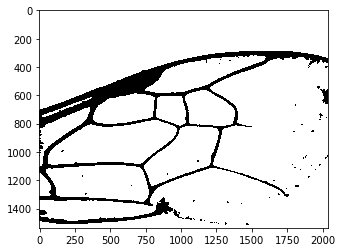

In [43]:
threshold_val = otsu(img)
bin_img = (img > threshold_val).astype(np.uint8)
plt.imshow(bin_img, cmap = 'gray')

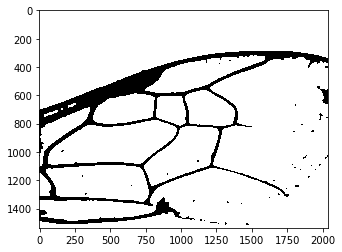

In [44]:
kernel = np.ones((5, 5), np.uint8)
opening = cv2.morphologyEx(bin_img,cv2.MORPH_OPEN,kernel, iterations = 3)
plt.imshow(opening, cmap='gray')

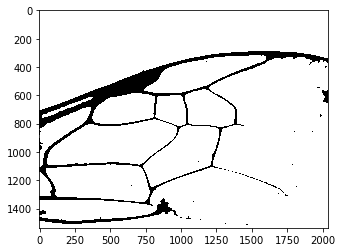

In [34]:
bg = cv2.dilate(opening,kernel,iterations=3)
plt.imshow(bg, cmap='gray')

# Process all

(1536, 2039)
(1536, 2039)
(1536, 2039)
(1536, 2039)
(1536, 2039)
(1536, 2039)
(1536, 2039)
(1536, 2039)
(1536, 2048)
(1536, 2048)
(2039, 1536)
(1536, 2039)
(1536, 2039)
(1536, 2039)
(1536, 2039)
(1536, 2039)
(1536, 2039)
(1536, 2039)
(1536, 2039)
(1536, 2039)
(1536, 2048)
(1536, 2039)
(1536, 2039)
(1536, 2039)
(1536, 2039)
(1536, 2048)
(1536, 2039)
(1536, 2039)
(1536, 2048)
(1536, 2039)
(1536, 2039)
(1536, 2039)


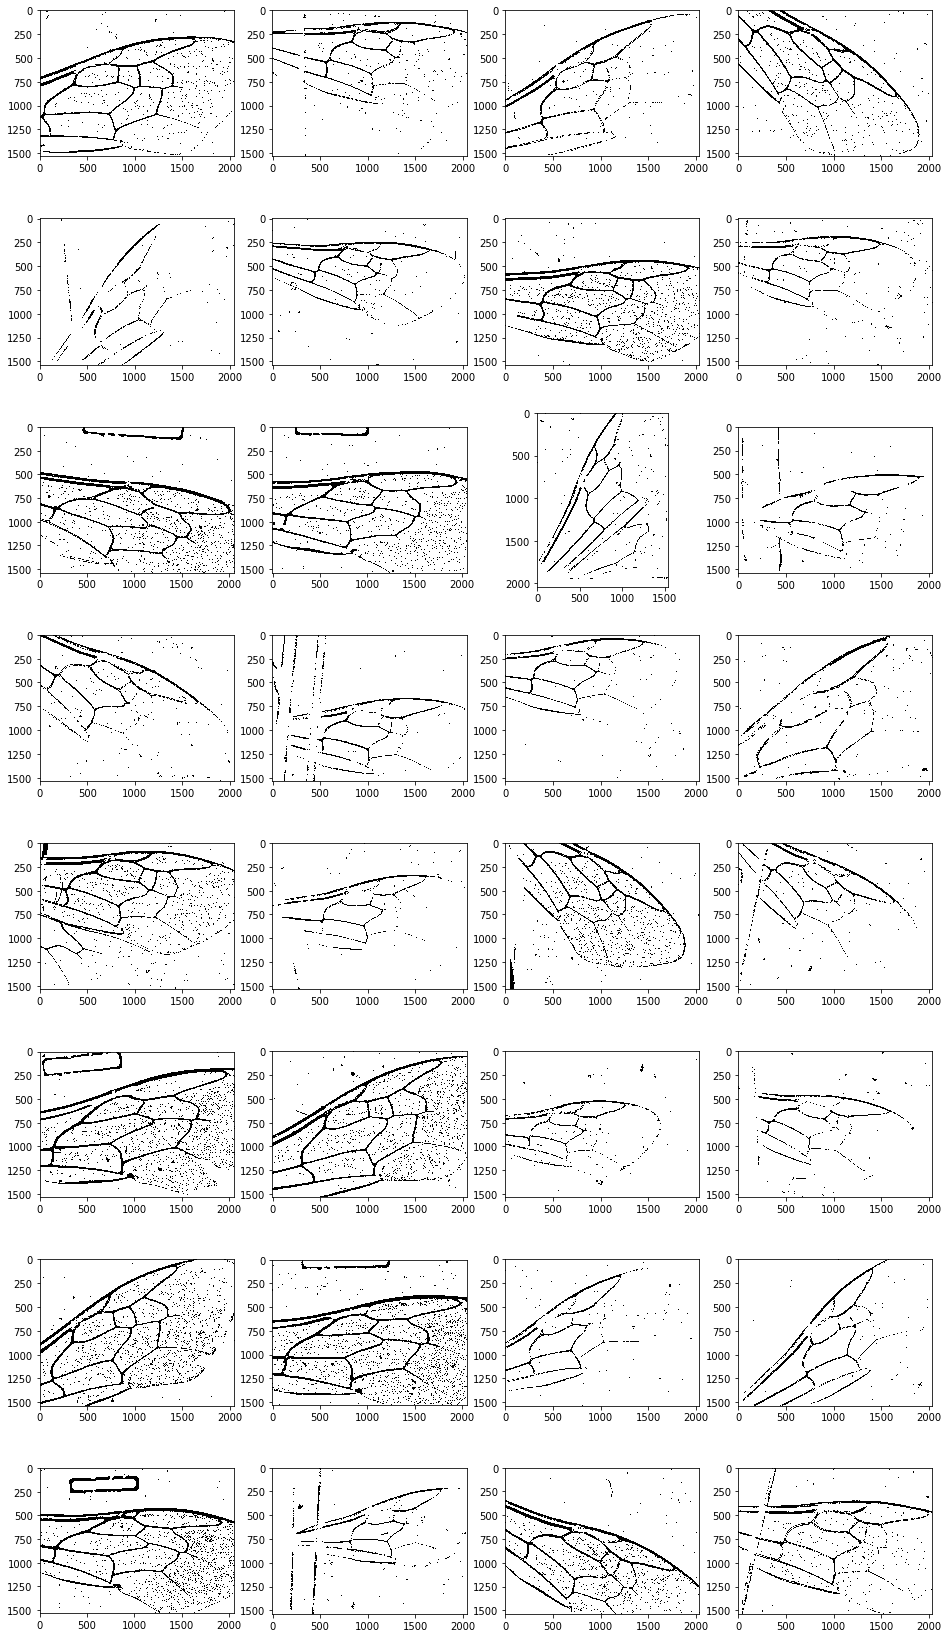

In [30]:
fig=plt.figure(figsize=(16, 30))
bin_imgs = []
for i in range(train_imgs.shape[0]):
    img_gray = cv.cvtColor(train_imgs[i], cv.COLOR_BGR2GRAY)
    print(img_gray.shape)
    binarized = cv.adaptiveThreshold(img_gray, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C,
                                        cv.THRESH_BINARY, 179, 28)
    bin_imgs.append(binarized)
    bin_imgs[i] = binarized
    fig.add_subplot(8, 4, i+1)
    plt.imshow(binarized, cmap='gray')
plt.show()

(1536, 2039)


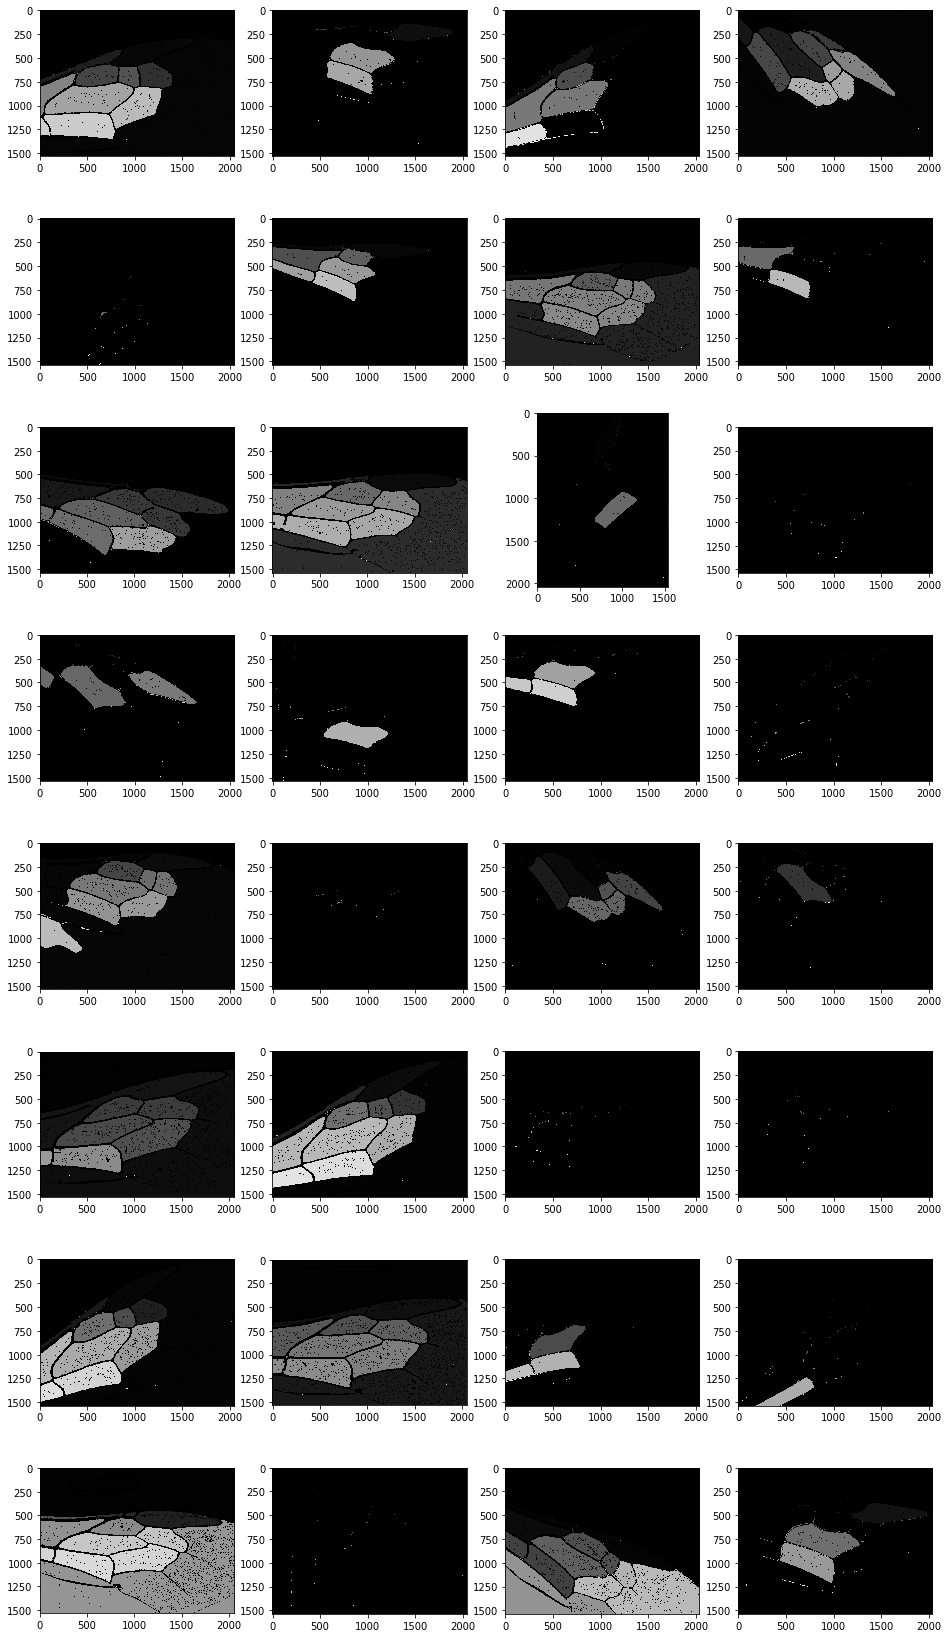

In [39]:
binarized = np.asarray(binarized, dtype=np.uint8)
print(binarized.shape)
fig=plt.figure(figsize=(16, 30))
for i in range(len(bin_imgs)):
    ret, labels = cv.connectedComponents(bin_imgs[i])
    fig.add_subplot(8, 4, i+1)
    plt.imshow(labels, cmap='gray')
plt.show()

In [39]:
kernel = np.array((
        [0, 1, 0],
        [1, -1, 1],
        [0, 1, 0]), dtype="int")

output_image = cv.morphologyEx(img, cv.MORPH_HITMISS, kernel)

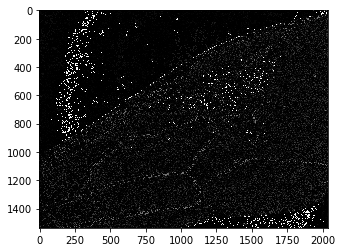

In [9]:
plt.imshow(output_image, cmap= 'gray')